<a href="https://colab.research.google.com/github/Shivansh1200/Data-Science-World/blob/master/Marks_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#1.  Business Problem

Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


#2.  Load Dataset


In [5]:
path = r"https://drive.google.com/uc?export=download&id=13ZTYmL3E8S0nz-UKl4aaTZJaI3DVBGHM"
df  = pd.read_csv(path)

In [6]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.info()

In [43]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

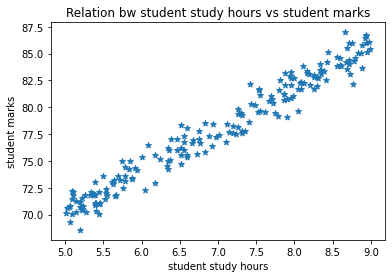

In [10]:
plt.scatter(df.study_hours,df.student_marks, marker='*')
plt.xlabel("student study hours")
plt.ylabel("student marks")
plt.title("Relation bw student study hours vs student marks")
plt.show()

Preapre the Data for ML algo-

In [11]:
#Data Cleaning

In [12]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [13]:
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


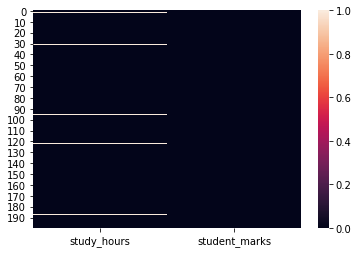

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [22]:
df2=df.fillna(df.mean())

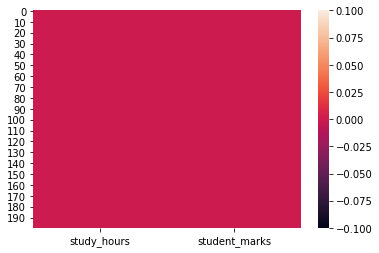

In [21]:
sns.heatmap(df2.isnull())

Data Spliting

In [ ]:
X=df2.drop('student_marks', axis='columns')
y=df2.drop('study_hours', axis='columns')

In [38]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (200, 1)
shape of y: (200, 1)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)

In [40]:
print("shape of X_train", X_train.shape)
print("shape of Xtest", X_test.shape)
print("shape of y_train", y_train.shape)
print("shape of y_test", y_test.shape)

shape of X_train (160, 1)
shape of Xtest (40, 1)
shape of y_train (160, 1)
shape of y_test (40, 1)


Selecting a model or correct model..

In [41]:
# y=m*x+c

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [44]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lr.predict([[4]])[0][0].round(2)

66.19

In [51]:
y_pred=lr.predict(X_test)

In [52]:
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [58]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns=["study_hours", "students_marks_original", "students_marks_predicted"])

,study_hours,students_marks_original,students_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


Fine Tune your Model : accuracy check

In [59]:
lr.score(X_test, y_test)

0.9514124242154466

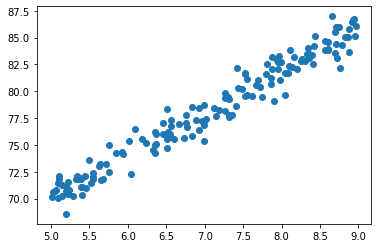

In [63]:
plt.scatter(X_train, y_train)

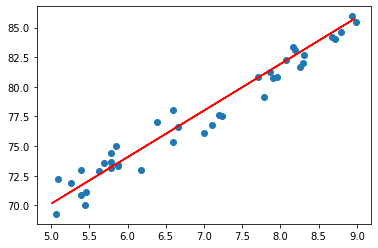

In [65]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color="r")

# Present your Solution ( or  Model  )

In [66]:
# Save your ML Model

In [69]:
import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

['student_mark_predictor.pkl']

In [72]:
model=joblib.load('student_mark_predictor.pkl')

In [73]:
model.predict([[5]])[0][0]

70.12594512018406

In [ ]:
#  Launch, Monitor and Maintain your System